In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from source.project_manager import (
    load_slurm_metadata,
    delete_slurm_data,
    check_slurm_data_exists,
)

In [2]:
project_metadata = load_slurm_metadata()
project_metadata = project_metadata.set_index(["stream_names","stream_statistic","alpha"]).sort_index()
print(project_metadata.columns)
print(project_metadata.shape)

Index(['method', 'assert_device', 'architecture', 'max_batches', 'min_change',
       'seed', 'batch_size', 'num_classes', 'input_shape', 'image_index',
       'monitored_statistic', 'monitored_stream', 'dataset', 'label',
       'time_to_compute', 'batch_index', 'monitored_statistic_change', 'paths',
       'path_prefix'],
      dtype='object')
(300, 19)


In [3]:
project_metadata.index.value_counts()

stream_names           stream_statistic  alpha
log_probs              mean[X]           0.1      5
                                         0.2      5
results_at_projection  mean[X^2]         0.3      5
                                         0.4      5
                                         0.5      5
                                         0.6      5
                                         0.7      5
                                         0.8      5
                                         0.9      5
                                         1.0      5
vanilla_grad_mask      mean[X]           0.1      5
                                         0.2      5
                                         0.3      5
                                         0.4      5
                                         0.5      5
                                         0.6      5
                                         0.7      5
                                         0.8      5
                 

Text(0.01, 312, '312')

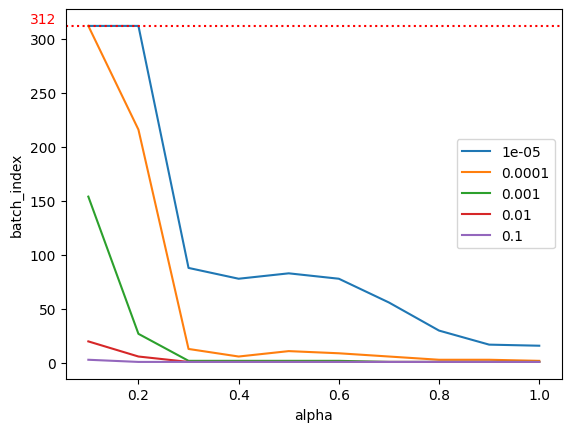

In [81]:
selected_rows = project_metadata.loc[("log_probs","mean[X]"),:]
selected_rows.groupby("min_change")["batch_index"].plot(legend=True)
plt.ylabel("batch_index")

# max_batches
max_batches = project_metadata.iloc[0,:]["max_batches"]
plt.axhline(y=max_batches, color="red",linestyle=":")
plt.text(0.01,max_batches, f"{max_batches:.0f}", color="red", ha="center", va="bottom")

In [82]:
project_metadata.loc[("log_probs","mean[X]")].groupby("min_change")["time_to_compute"].agg(['sum','count'])

,sum,count
min_change,,
0.00001,213.174828,10
0.00010,174.720595,10
0.00100,141.025274,10
0.01000,130.098629,10
0.10000,127.804926,10


Text(0, 0.5, 'results_at_projection')

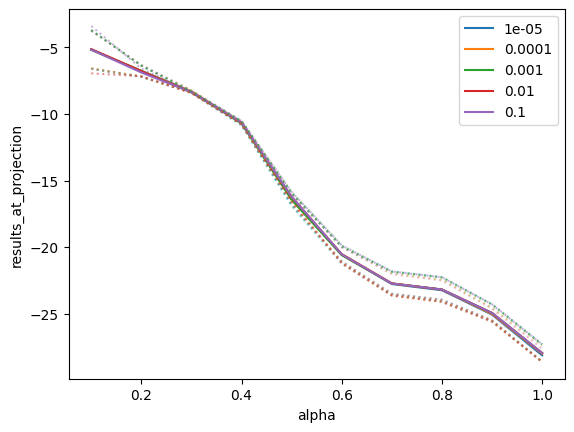

In [148]:

selected_rows = project_metadata.loc["results_at_projection",:]
values = selected_rows.loc[:,"paths"].apply(lambda path: np.load(path))
selected_rows = project_metadata.loc[("results_at_projection","mean[X]"),:]

meanx = values.loc["mean[X]"]
std = np.sqrt(values.loc["mean[X^2]"] - values.loc["mean[X]"]**2)
meanx.name = "mean[X]"
var.name = "std[X]"
selected_rows = pd.concat([selected_rows,meanx,var],axis=1)
groupped = selected_rows.groupby("min_change")
groupped["mean[X]"].plot(legend=True)
groupped.apply(lambda x: plt.plot(
    x.index, 
    x["mean[X]"] - x["std[X]"], 
    x.index,
    x["mean[X]"] + x["std[X]"], 
    alpha=0.5,
    linestyle=":"))
# plt.yscale("log")
plt.ylabel("results_at_projection")

In [8]:
delete_slurm_data(project_metadata["paths"],exists)

stream_names       stream_statistic  alpha
log_probs          mean[X]           0.2      None
                                     0.2      None
                                     0.2      None
                                     0.2      None
                                     0.2      None
                                              ... 
vanilla_grad_mask  mean[X^2]         1.0      None
                                     1.0      None
                                     1.0      None
                                     1.0      None
                                     1.0      None
Name: paths, Length: 295, dtype: object

In [9]:
check_slurm_data_exists(project_metadata["paths"])

stream_names       stream_statistic  alpha
log_probs          mean[X]           0.1      False
                                     0.1      False
                                     0.1      False
                                     0.1      False
                                     0.1      False
                                              ...  
vanilla_grad_mask  mean[X^2]         1.0      False
                                     1.0      False
                                     1.0      False
                                     1.0      False
                                     1.0      False
Name: paths, Length: 300, dtype: bool

In [17]:
ls /local_storage/users/amirme/raw_data/

'/local_storage/users/amirme/raw_data/2023-08-29_14-54-15-615166.log_probs.mean[X^2].npy'
'/local_storage/users/amirme/raw_data/2023-08-29_14-54-15-615166.results_at_projection.mean[X^2].npy'
'/local_storage/users/amirme/raw_data/2023-08-29_14-54-15-615166.results_at_projection.mean[X].npy'
'/local_storage/users/amirme/raw_data/2023-08-29_14-54-15-615166.vanilla_grad_mask.mean[X^2].npy'
'/local_storage/users/amirme/raw_data/2023-08-29_14-54-15-615166.vanilla_grad_mask.mean[X].npy'
